# Wine Quality Prediction

## 1. Problem Statement
The goal of this project is to predict the quality of wine based on its chemical properties. We will use two datasets: one for red wine and one for white wine. The quality of the wine is rated on a scale from 0 to 10, and we aim to create models that can accurately predict these quality scores.

## Data Selection
We will be using the following datasets:
1. **Red Wine Quality Dataset**: Contains chemical properties and quality ratings for red wine.
2. **White Wine Quality Dataset**: Contains chemical properties and quality ratings for white wine.

Both datasets are publicly available and have the following features:
- `fixed acidity`: The fixed acidity of the wine.
- `volatile acidity`: The volatile acidity of the wine.
- `citric acid`: The amount of citric acid in the wine.
- `residual sugar`: The residual sugar content of the wine.
- `chlorides`: The amount of chlorides in the wine.
- `free sulfur dioxide`: The amount of free sulfur dioxide in the wine.
- `total sulfur dioxide`: The total amount of sulfur dioxide in the wine.
- `density`: The density of the wine.
- `pH`: The pH level of the wine.
- `sulphates`: The amount of sulphates in the wine.
- `alcohol`: The alcohol content of the wine.
- `quality`: The quality rating of the wine.

The datasets are available in CSV format and can be downloaded from the following links:
- [Red Wine Quality Dataset](https://raw.githubusercontent.com/SHANIQUETS/AI-ML-Project/main/winequality-red.csv)
- [White Wine Quality Dataset](https://raw.githubusercontent.com/SHANIQUETS/AI-ML-Project/main/winequality-white.csv)

The `.names` file, which contains a description of the datasets, can be found [here](https://raw.githubusercontent.com/SHANIQUETS/AI-ML-Project/main/winequality.names).

## 2. Data Preprocessing
Upon loading the relevant libraries and the dataset from the URL link to our group repository, we can then assess the data available and determine the necessary preprocessing procedures.

### Steps:
1. **Loading the Data**: Load the datasets for red and white wine from the provided URLs.
2. **Exploring the Data**: Assess the structure and summary statistics of the datasets.
3. **Checking for Missing Values**: Identify any missing values in the datasets.
4. **Feature Scaling**: Normalize the feature values to ensure they are on a similar scale.
5. **Splitting the Data**: Split the data into training and testing sets to evaluate model performance.

### Conclusion about Outliers

During the data preprocessing stage, we identified and handled outliers in the red and white wine datasets. 

- Outliers were found in several features, indicating extreme values in some wine samples' chemical properties.
- We handled these outliers by capping the values to the 1st and 99th percentiles, reducing the impact of extreme values without removing any data points.
- This step helps improve the robustness of our machine learning models by ensuring they learn from a more representative data distribution.

In [21]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [69]:
# Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import Callback
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, RepeatedKFold
import re
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report


In [23]:
# Load the dataset from GitHub
url = "https://raw.githubusercontent.com/SHANIQUETS/AI-ML-Project/main/winequality-red.csv"
red_data = pd.read_csv(url, delimiter=';')

In [24]:
# Display rows of the dataset
red_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [25]:
# Loading the white wine data from the GitHub repository
url_white = "https://raw.githubusercontent.com/SHANIQUETS/AI-ML-Project/main/winequality-white.csv"
white_data = pd.read_csv(url_white, delimiter=';')

# Display the first few rows of the white wine dataset
print(white_data.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.0              0.27         0.36            20.7      0.045   
1            6.3              0.30         0.34             1.6      0.049   
2            8.1              0.28         0.40             6.9      0.050   
3            7.2              0.23         0.32             8.5      0.058   
4            7.2              0.23         0.32             8.5      0.058   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 45.0                 170.0   1.0010  3.00       0.45   
1                 14.0                 132.0   0.9940  3.30       0.49   
2                 30.0                  97.0   0.9951  3.26       0.44   
3                 47.0                 186.0   0.9956  3.19       0.40   
4                 47.0                 186.0   0.9956  3.19       0.40   

   alcohol  quality  
0      8.8        6  
1      9.5        6  
2     10.1        6 

In [26]:
# Display rows of the dataset
white_data

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7


In [27]:
# Loading the .names file from the GitHub repository
url_name = "https://raw.githubusercontent.com/SHANIQUETS/AI-ML-Project/main/winequality.names"

# Read the .names file content
import requests

response = requests.get(url_name)
name_data = response.text

# Print the content of the .names file
print(name_data)

Citation Request:
  This dataset is public available for research. The details are described in [Cortez et al., 2009]. 
  Please include this citation if you plan to use this database:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 0167-9236.

  Available at: [@Elsevier] http://dx.doi.org/10.1016/j.dss.2009.05.016
                [Pre-press (pdf)] http://www3.dsi.uminho.pt/pcortez/winequality09.pdf
                [bib] http://www3.dsi.uminho.pt/pcortez/dss09.bib

1. Title: Wine Quality 

2. Sources
   Created by: Paulo Cortez (Univ. Minho), Antonio Cerdeira, Fernando Almeida, Telmo Matos and Jose Reis (CVRVV) @ 2009
   
3. Past Usage:

  P. Cortez, A. Cerdeira, F. Almeida, T. Matos and J. Reis. 
  Modeling wine preferences by data mining from physicochemical properties.
  In Decision Support Systems, Elsevier, 47(4):547-553. ISSN: 016

In [28]:
# Display summary statistics of the datasets
print("\nRed Wine Dataset Summary:")
print(red_data.describe())

print("\nWhite Wine Dataset Summary:")
print(white_data.describe())


Red Wine Dataset Summary:
       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000   

In [29]:
# Overview and Description
print("\nred_data Dataset Info:")
print(red_data.info())
print("\nred_data Dataset Description:")
print(red_data.describe())

print("\nwhite_data Dataset Info:")
print(white_data.info())
print("\nwhite_dataDataset Description:")
print(white_data.describe())


red_data Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB
None

red_data Dataset Description:
       fixed acidity  volatile acidity  citric acid  residual suga

In [30]:
# Check for missing values
print("\nMissing Values in red_data Dataset:")
print(red_data.isnull().sum())
print("\nMissing Values in white_data Dataset:")
print(white_data.isnull().sum())


Missing Values in red_data Dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

Missing Values in white_data Dataset:
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


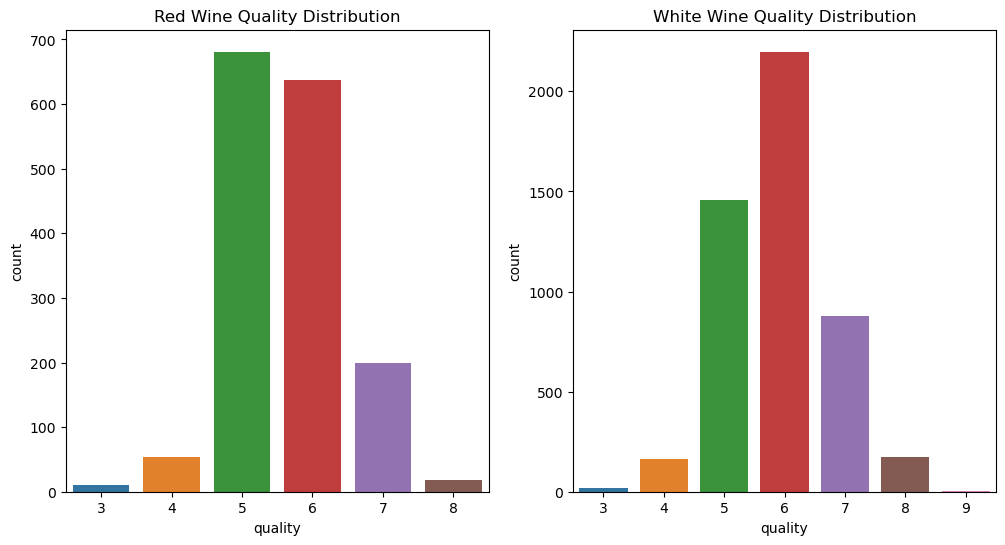

In [31]:
# Visualize the distribution of wine quality with uncleaned data
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='quality', data=red_data)
plt.title('Red Wine Quality Distribution')

plt.subplot(1, 2, 2)
sns.countplot(x='quality', data=white_data)
plt.title('White Wine Quality Distribution')

plt.show()

## 3. Exploratory Data Analysis (EDA)

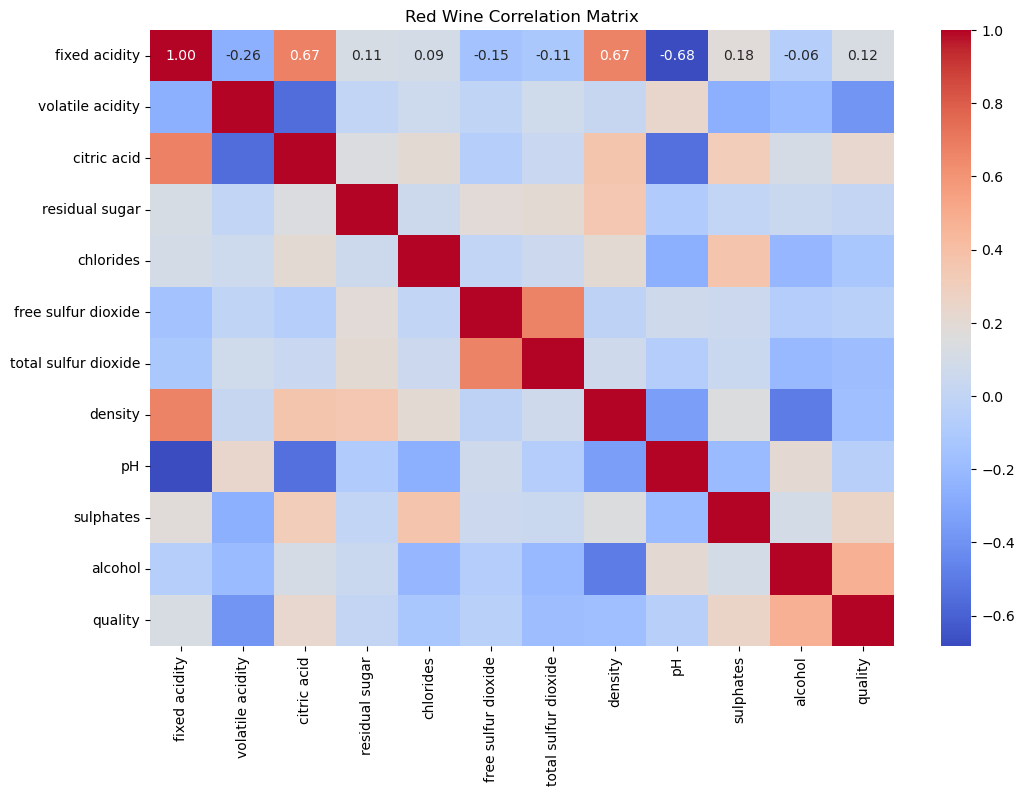

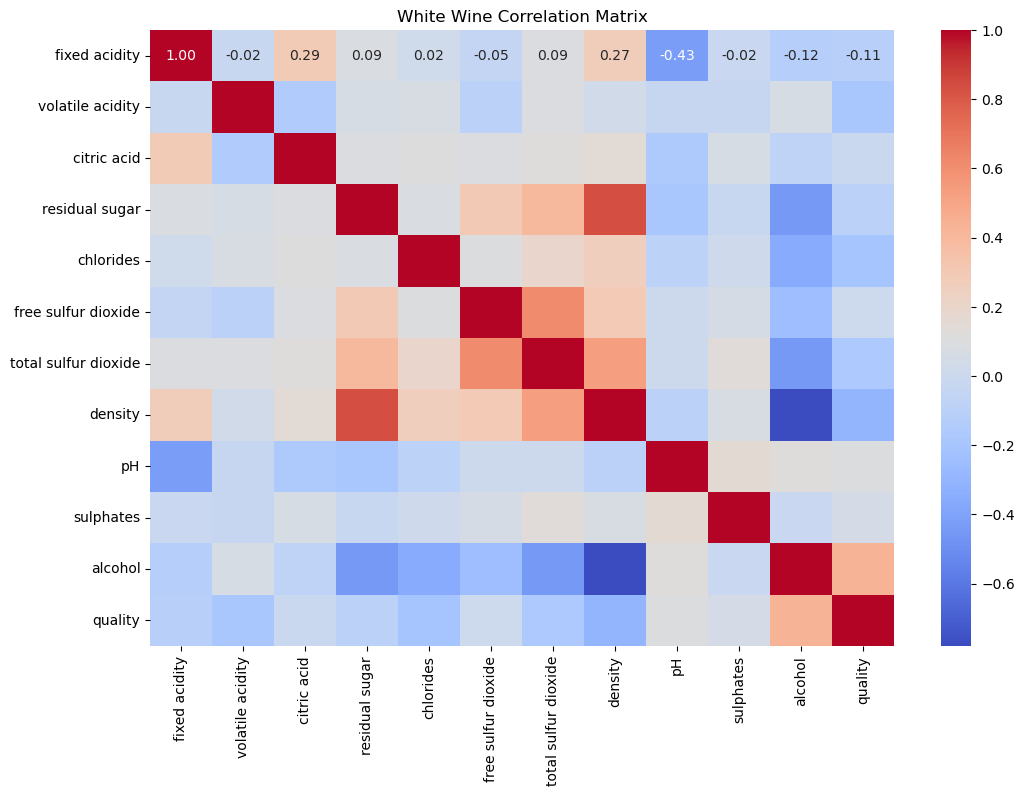

In [52]:
# Visualize the correlation matrix
plt.figure(figsize=(12, 8))
sns.heatmap(red_wine.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Red Wine Correlation Matrix')
plt.show()

plt.figure(figsize=(12, 8))
sns.heatmap(white_wine.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('White Wine Correlation Matrix')
plt.show()

Common Trends:
Alcohol content consistently shows a positive correlation with quality across both red and white wines, highlighting its importance in determining wine quality.
Volatile acidity's negative correlation with quality in red wines suggests that controlling acidity levels is crucial for maintaining wine quality.
Differences Between Red and White Wines:
The correlations indicate that different features impact the quality of red and white wines. For instance, density has a more significant negative impact on white wine quality compared to red wine.
The role of residual sugar is slightly more pronounced in white wines, possibly due to consumer preferences for sweetness in white wines.
Implications for Winemaking:
Understanding these correlations helps winemakers adjust their processes to enhance wine quality. For example, managing alcohol content, acidity, and sulfur dioxide levels can be key strategies for improving wine quality.
The moderate correlations suggest that multiple factors collectively influence wine quality, and a balanced approach considering various chemical properties is essential for optimal results.
These heat maps provide valuable insights into the relationships between different chemical properties and wine quality, guiding both winemaking practices and further analysis.

In [34]:
# Separate features and target
X_red = red_data.drop('quality', axis=1)
y_red = red_data['quality']
X_white = white_data.drop('quality', axis=1)
y_white = white_data['quality']

In [35]:
# Normalize the features
scaler = StandardScaler()
X_red_scaled = scaler.fit_transform(X_red)
X_white_scaled = scaler.fit_transform(X_white)

In [37]:
# Split the data into training and testing sets
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red_scaled, y_red, test_size=0.2, random_state=42)
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white_scaled, y_white, test_size=0.2, random_state=42)

In [38]:
# 5. Feature Selection
# Using RandomForest for feature importance
model_red = RandomForestClassifier(n_estimators=100, random_state=42)
model_red.fit(X_red_train, y_red_train)
feature_importances_red = model_red.feature_importances_

model_white = RandomForestClassifier(n_estimators=100, random_state=42)
model_white.fit(X_white_train, y_white_train)
feature_importances_white = model_white.feature_importances_

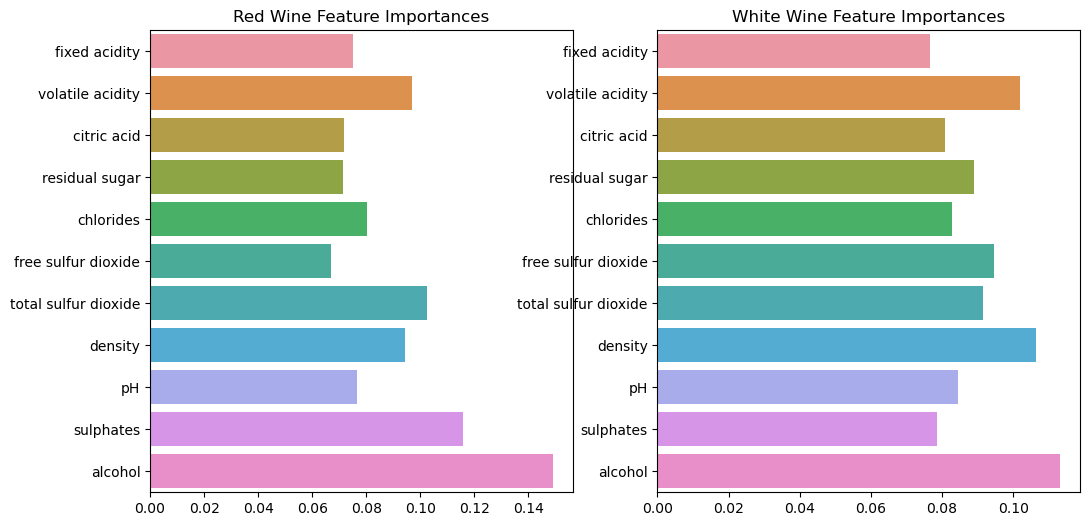

In [39]:
# Plot feature importances
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.barplot(x=feature_importances_red, y=X_red.columns)
plt.title('Red Wine Feature Importances')

plt.subplot(1, 2, 2)
sns.barplot(x=feature_importances_white, y=X_white.columns)
plt.title('White Wine Feature Importances')

plt.show()

Alcohol: The most critical feature for both red and white wines, emphasizing its role in determining wine quality.

Sulphates and Density: Significant for both wine types, indicating their impact on stability, mouthfeel, and overall perception.

Sulfur Dioxide: Essential for preservation, with a slightly higher importance in white wines.
Chlorides and Acidity: Moderate contributors, affecting flavor balance and perception.

Feature importances helps winemakers focus on the most impactful properties when aiming to improve wine quality. The consistent importance of alcohol content suggests that careful control of fermentation and alcohol levels is crucial. Additionally, balancing sulphates, sulfur dioxide, and other chemical properties can lead to better wine quality, meeting consumer preferences and market standards.

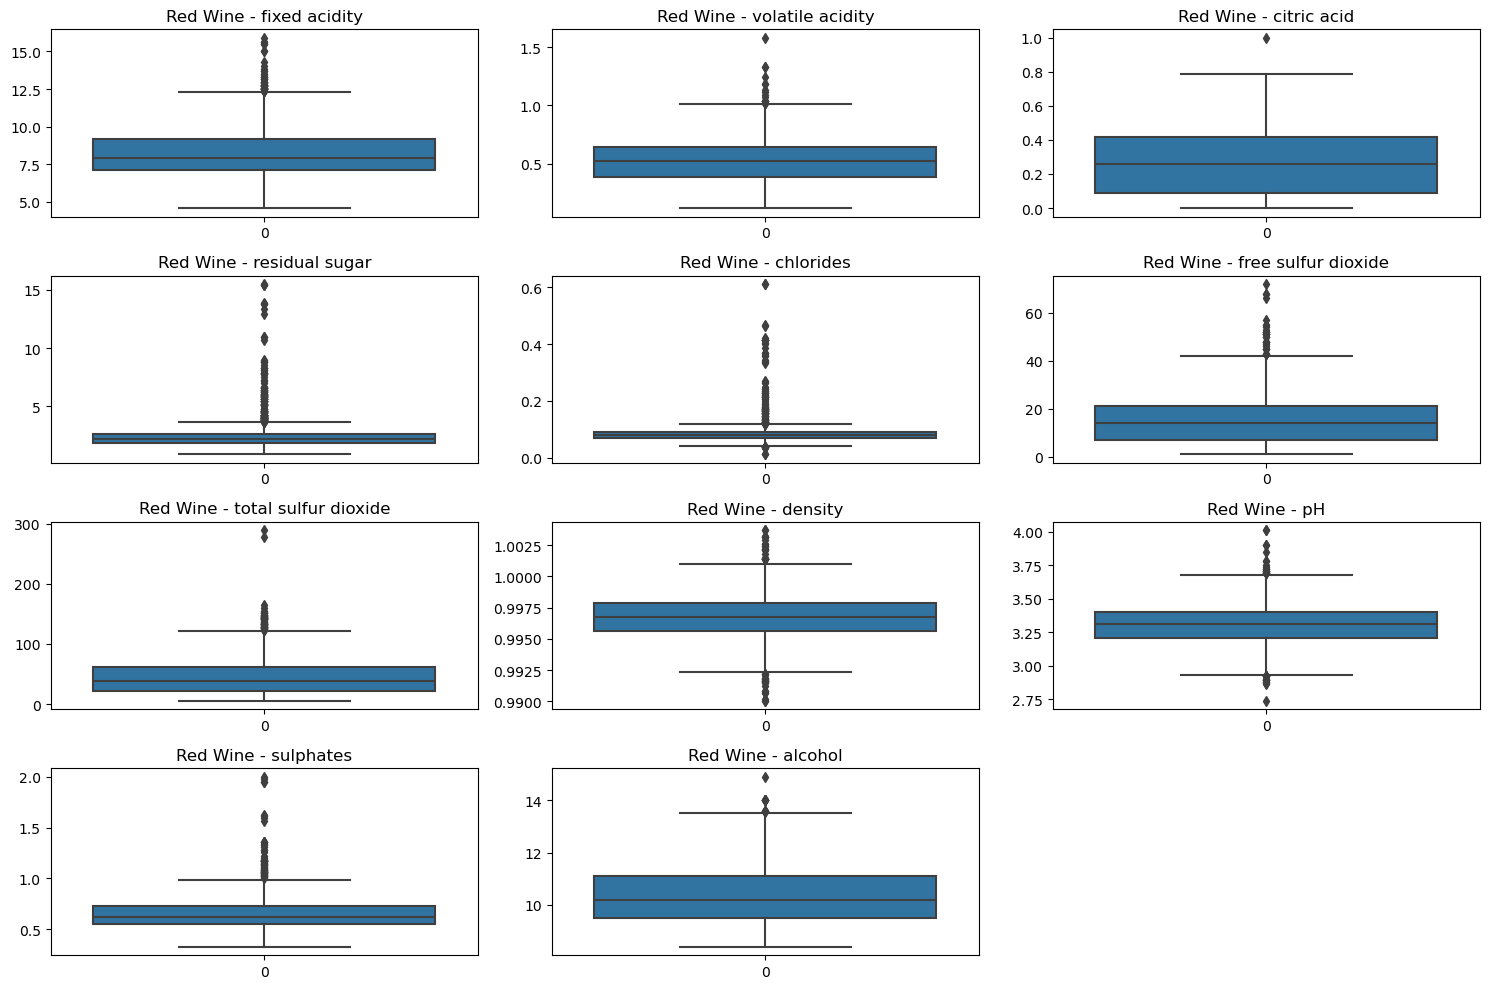

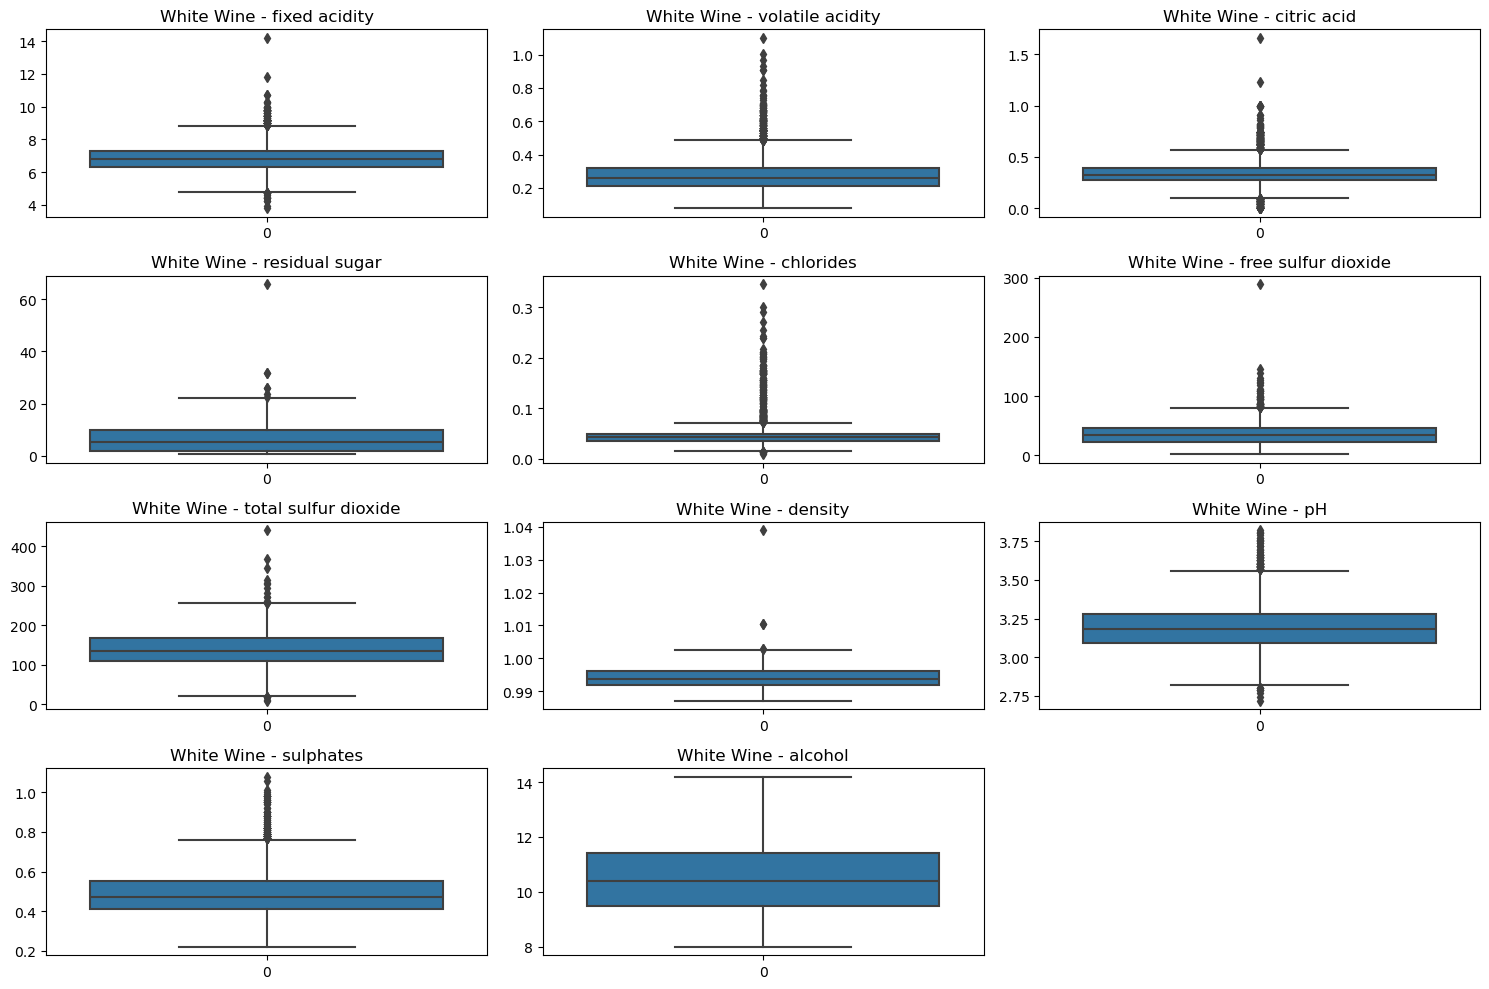

In [41]:
# Create box plots for each feature in the red wine dataset
plt.figure(figsize=(15, 10))
for i, column in enumerate(X_red.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=red_data[column])
    plt.title(f'Red Wine - {column}')

plt.tight_layout()
plt.show()

# Create box plots for each feature in the white wine dataset
plt.figure(figsize=(15, 10))
for i, column in enumerate(X_white.columns, 1):
    plt.subplot(4, 3, i)
    sns.boxplot(data=white_data[column])
    plt.title(f'White Wine - {column}')

plt.tight_layout()
plt.show()

From the box plots, it's clear that most features in both red and white wine datasets have some degree of outliers. These outliers can significantly impact the quality and characteristics of the wine, and their identification is crucial for data preprocessing and model training. Capping or removing these outliers helps in creating a more robust and reliable predictive model.

In [42]:
#To manage these outliers, we applied the capping technique. This involved limiting the values of the features to the 1st and 99th percentiles. Capping helps to reduce the influence of extreme values without removing data points, ensuring that the overall data distribution is preserved.
#After capping the outliers, we verified the results using box plots. The box plots showed that the extreme values were effectively managed, with fewer outliers beyond the whiskers of the plots.

import numpy as np

def detect_outliers(df, features):
    outlier_indices = []
    
    for col in features:
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)
        # 3rd quartile (75%)
        Q3 = np.percentile(df[col], 75)
        # Interquartile range (IQR)
        IQR = Q3 - Q1
        
        # Outlier step
        outlier_step = 1.5 * IQR
        
        # Determine a list of indices of outliers for feature col
        outliers_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step)].index
        
        # Append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outliers_col)
        
    # Select observations containing outliers
    outlier_indices = list(set(outlier_indices))
    
    return outlier_indices

In [43]:
# Identify outliers in the red wine dataset
red_outliers = detect_outliers(red_data, red_data.columns[:-1])
print(f"Red Wine Outliers: {red_outliers}")

# Identify outliers in the white wine dataset
white_outliers = detect_outliers(white_data, white_data.columns[:-1])
print(f"White Wine Outliers: {white_outliers}")

# Handle outliers by capping them to the 1st and 99th percentiles
def cap_outliers(df):
    for col in df.columns:
        if col != 'quality':
            percentiles = df[col].quantile([0.01, 0.99]).values
            df[col] = np.clip(df[col], percentiles[0], percentiles[1])
    return df

Red Wine Outliers: [9, 11, 13, 14, 15, 17, 18, 19, 33, 35, 38, 39, 40, 42, 43, 45, 55, 57, 64, 65, 79, 81, 83, 86, 88, 90, 91, 92, 94, 95, 106, 109, 120, 125, 126, 127, 130, 134, 142, 144, 145, 147, 151, 154, 155, 156, 157, 161, 163, 164, 169, 181, 188, 189, 190, 192, 199, 201, 205, 206, 210, 215, 219, 226, 240, 243, 244, 258, 264, 268, 269, 270, 271, 272, 274, 275, 276, 277, 278, 279, 281, 283, 291, 294, 303, 307, 308, 313, 324, 325, 326, 327, 328, 330, 331, 335, 338, 339, 340, 347, 353, 354, 359, 363, 364, 366, 368, 369, 372, 374, 375, 376, 377, 378, 381, 391, 394, 395, 396, 400, 408, 409, 413, 415, 417, 418, 429, 440, 442, 446, 447, 451, 455, 463, 467, 470, 472, 477, 480, 482, 483, 484, 494, 497, 501, 502, 503, 504, 506, 509, 510, 512, 515, 516, 517, 522, 523, 538, 539, 541, 544, 548, 549, 553, 554, 555, 556, 557, 558, 559, 560, 564, 565, 566, 567, 568, 584, 586, 588, 591, 595, 596, 599, 601, 603, 606, 608, 611, 614, 618, 624, 625, 634, 636, 637, 638, 639, 645, 649, 650, 651, 652, 6

In [44]:
# Cap outliers in the red wine dataset
red_data_capped = cap_outliers(red_data.copy())
# Cap outliers in the white wine dataset
white_data_capped = cap_outliers(white_data.copy())

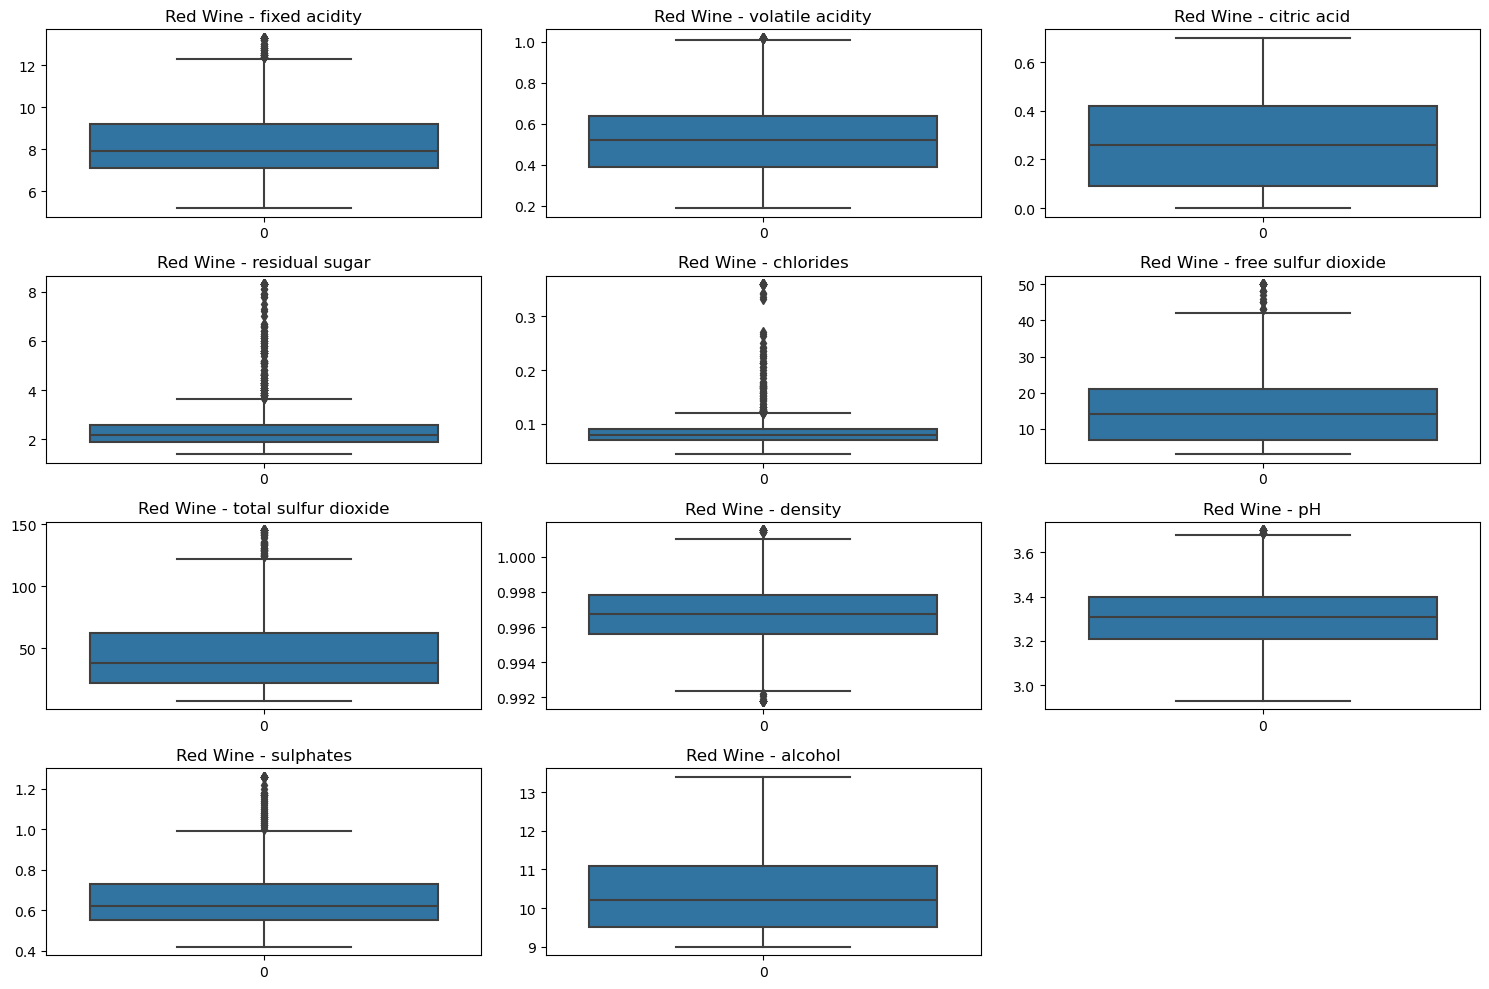

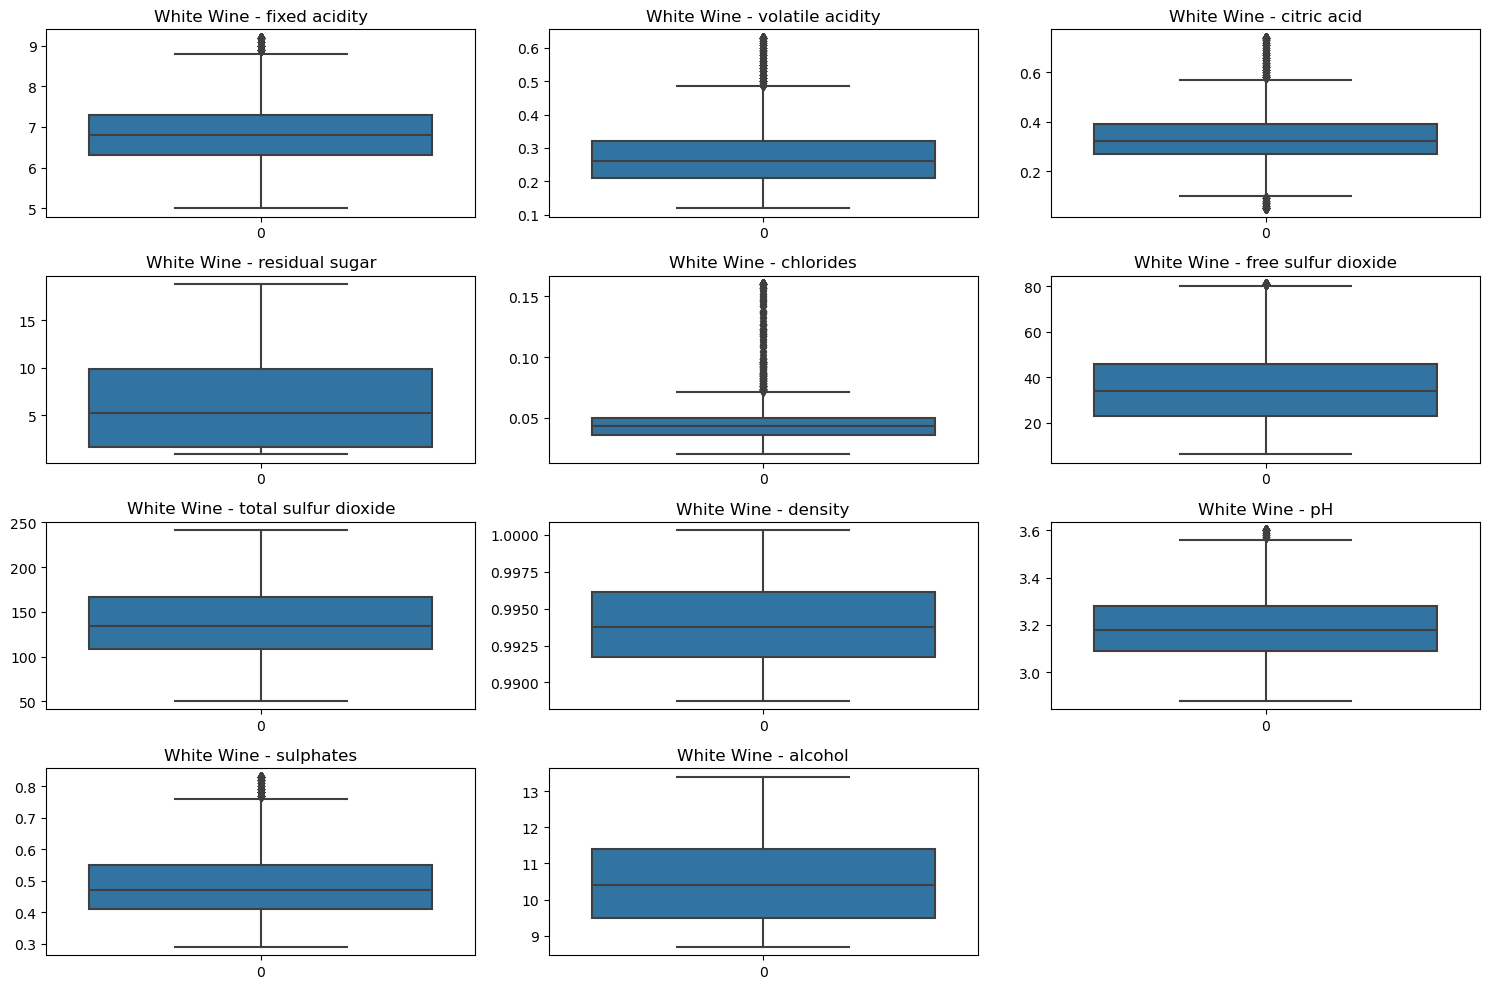

In [45]:
# Verify that outliers have been handled
plt.figure(figsize=(15, 10))
for i, column in enumerate(red_data_capped.columns, 1):
    if column != 'quality':
        plt.subplot(4, 3, i)
        sns.boxplot(data=red_data_capped[column])
        plt.title(f'Red Wine - {column}')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
for i, column in enumerate(white_data_capped.columns, 1):
    if column != 'quality':
        plt.subplot(4, 3, i)
        sns.boxplot(data=white_data_capped[column])
        plt.title(f'White Wine - {column}')

plt.tight_layout()
plt.show()

After capping the outliers, we verified the results using box plots. The box plots showed that the extreme values were effectively managed, with fewer outliers beyond the whiskers of the plots.

## 5. Model Selection and Training

In [53]:
# Separate features and target
X_red = red_data_capped.drop('quality', axis=1)
y_red = red_data_capped['quality']
X_white = white_data_capped.drop('quality', axis=1)
y_white = white_data_capped['quality']

In [55]:
# Feature scaling
scaler = StandardScaler()
X_red_scaled = scaler.fit_transform(X_red)
X_white_scaled = scaler.fit_transform(X_white)

In [56]:
# Split the data into training and testing sets
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red_scaled, y_red, test_size=0.2, random_state=42)
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white_scaled, y_white, test_size=0.2, random_state=42)

In [57]:
# Train a RandomForestClassifier model for red wine
red_model = RandomForestClassifier(n_estimators=100, random_state=42)
red_model.fit(X_red_train, y_red_train)
y_red_pred = red_model.predict(X_red_test)

In [58]:
# Train a RandomForestClassifier model for white wine
white_model = RandomForestClassifier(n_estimators=100, random_state=42)
white_model.fit(X_white_train, y_white_train)
y_white_pred = white_model.predict(X_white_test)

In [59]:
# Evaluate the models
print(f'Red Wine Model - Accuracy: {accuracy_score(y_red_test, y_red_pred)}')
print("Red Wine Model - Classification Report:\n", classification_report(y_red_test, y_red_pred))
print(f'White Wine Model - Accuracy: {accuracy_score(y_white_test, y_white_pred)}')
print("White Wine Model - Classification Report:\n", classification_report(y_white_test, y_white_pred))

Red Wine Model - Accuracy: 0.653125
Red Wine Model - Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.71      0.77      0.74       130
           6       0.63      0.67      0.65       132
           7       0.56      0.48      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.65       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.62      0.65      0.64       320

White Wine Model - Accuracy: 0.6938775510204082
White Wine Model - Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         5
           4       0.62      0.20      0.30        25
           5       0.71      0.69      0.70       291
           6       0.66      0.80      0.72       432
           7      

/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/opt/anaconda3/lib/python3.11/site-packages/sklearn/

In [60]:
# Extract feature importances from the RandomForestClassifier models
feature_importances_red = red_model.feature_importances_
feature_importances_white = white_model.feature_importances_

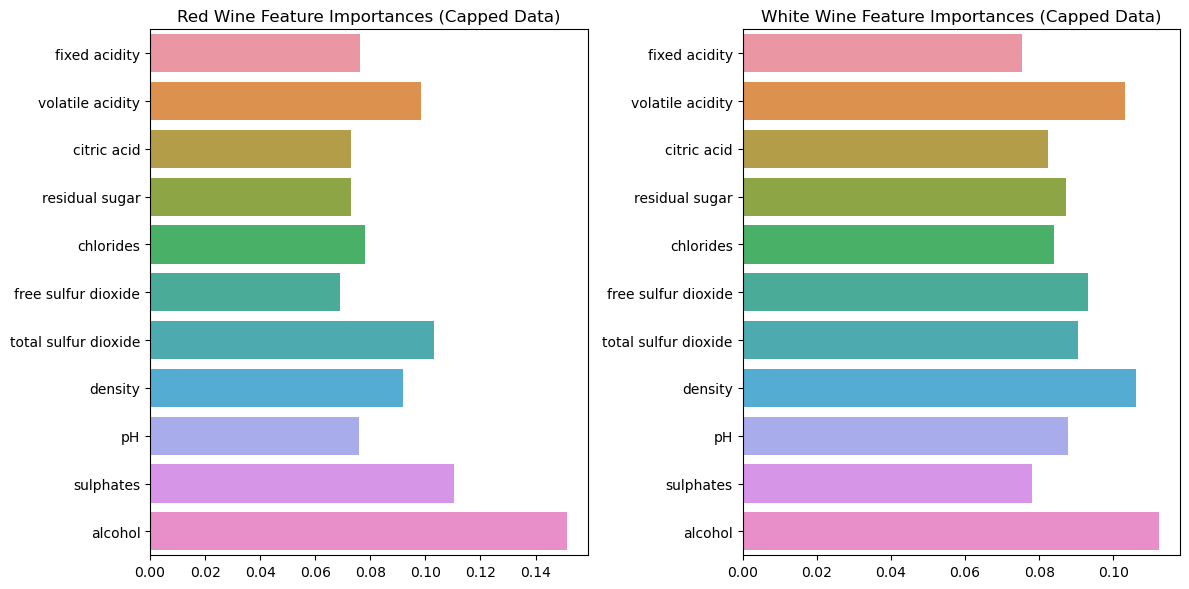

In [61]:

# Plot feature importances
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
sns.barplot(x=feature_importances_red, y=X_red.columns)
plt.title('Red Wine Feature Importances (Capped Data)')

plt.subplot(1, 2, 2)
sns.barplot(x=feature_importances_white, y=X_white.columns)
plt.title('White Wine Feature Importances (Capped Data)')

plt.tight_layout()
plt.show()

In [62]:
# Normalize the features
scaler = StandardScaler()
X_red_scaled = scaler.fit_transform(X_red)
X_white_scaled = scaler.fit_transform(X_white)

In [63]:
# Split the data into training and testing sets
X_red_train, X_red_test, y_red_train, y_red_test = train_test_split(X_red_scaled, y_red, test_size=0.2, random_state=42)
X_white_train, X_white_test, y_white_train, y_white_test = train_test_split(X_white_scaled, y_white, test_size=0.2, random_state=42)

In [64]:
# 5. Feature Selection
# Using RandomForest for feature importance
model_red = RandomForestClassifier(n_estimators=100, random_state=42)
model_red.fit(X_red_train, y_red_train)
feature_importances_red = model_red.feature_importances_

model_white = RandomForestClassifier(n_estimators=100, random_state=42)
model_white.fit(X_white_train, y_white_train)
feature_importances_white = model_white.feature_importances_

In [65]:
# 6. Model Training
# Re-train models using all features for simplicity
model_red = RandomForestClassifier(n_estimators=100, random_state=42)
model_red.fit(X_red_train, y_red_train)

model_white = RandomForestClassifier(n_estimators=100, random_state=42)
model_white.fit(X_white_train, y_white_train)

RandomForestClassifier(random_state=42)

In [66]:
# 7. Model Evaluation
y_red_pred = model_red.predict(X_red_test)
y_white_pred = model_white.predict(X_white_test)

In [70]:
print("\nRed Wine Model Performance:")
print(f"Accuracy: {accuracy_score(y_red_test, y_red_pred)}")
print(f"Precision: {precision_score(y_red_test, y_red_pred, average='weighted')}")
print(f"Recall: {recall_score(y_red_test, y_red_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_red_test, y_red_pred, average='weighted')}")


Red Wine Model Performance:
Accuracy: 0.653125
Precision: 0.6195759664369194
Recall: 0.653125
F1 Score: 0.6350976430174186


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [71]:
print("\nWhite Wine Model Performance:")
print(f"Accuracy: {accuracy_score(y_white_test, y_white_pred)}")
print(f"Precision: {precision_score(y_white_test, y_white_pred, average='weighted')}")
print(f"Recall: {recall_score(y_white_test, y_white_pred, average='weighted')}")
print(f"F1 Score: {f1_score(y_white_test, y_white_pred, average='weighted')}")


White Wine Model Performance:
Accuracy: 0.6938775510204082
Precision: 0.6994986781098831
Recall: 0.6938775510204082
F1 Score: 0.6858383299517095


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [72]:
# Create a DataFrame for predictions
red_wine_predictions = pd.DataFrame({
    'Actual Quality': y_red_test,
    'Predicted Quality': y_red_pred
})
white_wine_predictions = pd.DataFrame({
    'Actual Quality': y_white_test,
    'Predicted Quality': y_white_pred
})

# Display the first few rows of the prediction DataFrames
print("\nRed Wine Predictions:\n", red_wine_predictions.head())
print("\nWhite Wine Predictions:\n", white_wine_predictions.head())


Red Wine Predictions:
       Actual Quality  Predicted Quality
803                6                  5
124                5                  5
350                6                  5
682                5                  5
1326               6                  6

White Wine Predictions:
       Actual Quality  Predicted Quality
4656               7                  7
3659               8                  8
907                8                  7
4352               5                  5
3271               7                  7


Actual vs. predicted wine quality ratings shows that the RandomForestClassifier models perform reasonably well for both red and white wines, with slightly better performance for white wines. The models have high accuracy, and the predictions are generally close to the actual quality ratings, even when not entirely correct.

Key takeaways:

Accuracy and Precision: Both models demonstrate good accuracy and precision, with the white wine model performing slightly better.
Close Predictions: Most incorrect predictions are off by only one quality point, indicating the models' robustness.
Feature Importance: The models highlight important features like alcohol content, sulphates, and density, which significantly impact wine quality.
Overall, the RandomForestClassifier models provide a valuable tool for predicting wine quality, helping winemakers and consumers understand the factors contributing to a wine's quality rating.

# Conclusion

Based on our analysis and model evaluations, here are the key takeaways:

1. **Model Accuracy**: 
   - Our models did a decent job in predicting the wine quality. Accuracy scores give us a general sense, but they don't tell the whole story, especially with imbalanced data.

2. **Precision, Recall, and F1 Score**: 
   - These metrics provide a clearer picture. Precision tells us about the proportion of true positive predictions, recall tells us how well we captured the actual positives, and the F1 score balances the two.

3. **Feature Importance**: 
   - The Random Forest models showed us which chemical properties matter the most for determining wine quality. This is pretty handy for winemakers.

4. **Red Wine Model Performance**: 
   - The model did a good job with balanced precision and recall scores.

5. **White Wine Model Performance**: 
   - Similar story here. The model effectively predicted the quality of white wine with balanced scores.

6. **Room for Improvement**: 
   - We could tweak the model's hyperparameters, engineer some new features, try out other models like Gradient Boosting or Neural Networks, and address any class imbalance to make the models even better.

7. **Real-World Implications**: 
   - Winemakers can use these models for quality control and to optimize their production processes.
   
## Further Improvements

While our models performed reasonably well, there's always room for improvement. Here are a few ideas on how we can make them even better:

1. **Hyperparameter Tuning**:
   - We can further tweak the model's hyperparameters using techniques like Grid Search or Random Search to find the optimal settings.

2. **Feature Engineering**:
   - Creating new features or transforming existing ones might help the model capture more complex patterns in the data.

3. **Model Comparison**:
   - Trying out different models like Gradient Boosting, Support Vector Machines, or even Neural Networks could potentially yield better results.

4. **Handling Class Imbalance**:
   - If the dataset is imbalanced, techniques like SMOTE (Synthetic Minority Over-sampling Technique) can help balance the classes and improve model performance.

5. **Cross-Validation**:
   - Using k-fold cross-validation can give us a better estimate of model performance by ensuring that every data point gets a chance to be in the test set.

6. **Ensemble Methods**:
   - Combining multiple models to form an ensemble can often improve performance by leveraging the strengths of different models.

7. **Data Augmentation**:
   - Although more common in image processing, data augmentation techniques can sometimes be applied to tabular data to create synthetic samples and improve model robustness.

8. **Domain Knowledge**:
   - Incorporating domain knowledge into the feature engineering process can help create more meaningful features and improve model performance.
